### Imports

In [74]:
import os
import pandas as pd
import numpy as np
from csv import writer
import cv2
import matplotlib.pyplot as plt
import pathlib

### Loading Data into Text and CSV Files

In [75]:
# taking the path of the dataset 
# TODO: change the path from absolute to relative path - not working with the latter for some reason
folder = "/Users/reeteshsudhakar/Documents/GitHub/utk-image-classifier/utkface-images"

files = os.listdir(folder)
print(len(files))
# grabbing the info from each file name and printing it  

# opening the text file and csv file and writing the data to it as needed
with open("image_data.csv", "w") as csvfile:
    file_writer = writer(csvfile)
    file_writer.writerow(["Age", "Gender", "Race", "Date & Time"])
    for file in files:
        output_list = []
        file = file.strip(".jpg.chip.jpg")
        
        for item in file.split("_"):
            output_list.append(item)
        
        file_writer.writerow(output_list)
    
    csvfile.close()

# NOTE: the text file isn't being used in the current version of the code, only the CSV file is being used

print(int(files[0].split('_')[0]))
print(files[0])

23708
9
9_1_2_20161219204347420.jpg.chip.jpg


### Image Labels
The labels of each face image is embedded in the file name, formated like [age]_[gender]_[race]_[date&time].jpg

**age** is an integer from 0 to 116, indicating the age

**gender** is either 0 (male) or 1 (female)

**race** is an integer from 0 to 4, denoting White, Black, Asian, Indian, and Others (like Hispanic, Latino, Middle Eastern).

**date&time** is in the format of yyyymmddHHMMSSFFF, showing the date and time an image was collected to UTKFace

### Dataframe Testing

In [76]:
# converting data from csv to dataframe
df = pd.read_csv("image_data.csv")

# printing the entire dataframe
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(df)

# df -- only prints the first and last five rows (head and tail)

       Age  Gender               Race  Date & Time
0        9       1                  2    2.016e+16
1       36       0                  1    2.017e+16
2       86       1                  0    2.017e+16
3       26       1                  0    2.017e+16
4        1       1                  2    2.016e+16
5       52       0                  1    2.017e+16
6       25       1                  0    2.017e+16
7       16       0                  0    2.017e+16
8       27       0                  3    2.017e+16
9       36       0                  3    2.017e+16
10      58       0                  2    2.017e+16
11       6       1                  0    2.017e+16
12      35       1                  2    2.017e+16
13       1       1                  3    2.016e+16
14      26       1                  1    2.017e+16
15       2       0                  2    2.016e+16
16      53       1                  0    2.017e+16
17      35       0                  3    2.017e+16
18      23       1             

In [77]:
# grabbing data from the dataframe and placing into lists
ages = df["Age"].to_list()
genders = df["Gender"].to_list()
races = df["Race"].to_list()
images = []

print(len(ages))
print(len(genders))
print(len(races))

23708
23708
23708


In [78]:
for file in files:
    total = folder + '/' + file
    image = cv2.imread(total)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image,(48,48))
    images.append(image)
    
print(len(images))

23708


In [79]:
# checking to ensure the lists were generated from the dataframe correctly
print(ages[0])
print(genders[0])
print(races[0])

9
1
2


In [80]:
images_f=np.array(images)
genders_f=np.array(genders)
ages_f=np.array(ages)

In [81]:
np.save('image.npy',images_f)
np.save('gender.npy',genders_f)
np.save('age.npy',ages_f)

In [82]:
values, counts = np.unique(genders_f, return_counts=True)
print(counts)

[12391 11317]


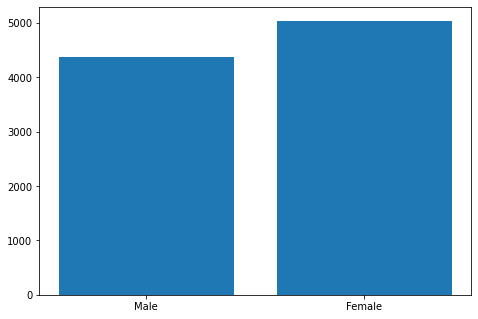

In [83]:
figure = plt.figure()
ax = figure.add_axes([0,0,1,1])
gender = ['Male', 'Female']
values = [4372,5047]
ax.bar(gender,values)
plt.show()

In [84]:
values, counts = np.unique(ages_f, return_counts=True)
print(counts)

[1123  482  289  273  196  131  139  263  166  156   65  130   81  157
  177  247  158  262   98  284  346  395  426  859  734 2197  615  918
  570  724  350  664  143  409  880  483  293  325  266  526  132  266
  157  100  440  153  170  153  148  381  138  232  241  353  268  236
   97  271   82  293  161  125  103   50  259   77   94  100   56  147
   33   98   63   32  148   58   28   69   23  133   22   40   18   24
  155   35   10   34   33   82    2   13    5    9   17    9   11    2
    1    5    5    1    3    4]


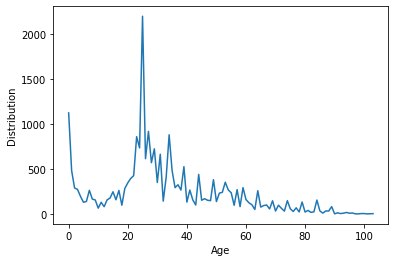

In [85]:
val = values.tolist()
cnt = counts.tolist()
plt.plot(counts)
plt.xlabel('Age')
plt.ylabel('Distribution')
plt.show()

In [86]:
labels = []

i = 0
while i < len(ages):
  label = []
  label.append([ages[i]])
  label.append([genders[i]])
  labels.append(label)
  i += 1

# print(labels)

In [87]:
images_f_2 = images_f / 255
labels_f = np.array(labels)
images_f_2.shape

(23708, 48, 48, 3)

In [88]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [89]:
X_train, X_test, Y_train, Y_test= train_test_split(images_f_2, labels_f,test_size=0.20)

In [90]:
Y_train_2=[Y_train[:,1],Y_train[:,0]]
Y_test_2=[Y_test[:,1],Y_test[:,0]]

In [125]:
import keras 
inputs = keras.Input(shape=(48, 48, 3), name="digits")
x = keras.layers.Dense(64, activation="relu", name="dense_1")(inputs)
x = keras.layers.Dense(64, activation="relu", name="dense_2")(x)
outputs = keras.layers.Dense(10, activation="softmax", name="predictions")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [126]:
model.compile(
    optimizer=tf.keras.optimizers.RMSprop(),  # Optimizer
    # Loss function to minimize
    loss=keras.losses.SparseCategoricalCrossentropy(),
    # List of metrics to monitor
    metrics=[keras.metrics.SparseCategoricalAccuracy()],
)

In [127]:
print("Fit model on training data")
history = model.fit(
    X_train,
    Y_train,
    batch_size=64,
    epochs=100,
    # We pass some validation for
    # monitoring validation loss and metrics
    # at the end of each epoch
    validation_data=(X_test, Y_test_2),
)

# https://www.tensorflow.org/guide/keras/train_and_evaluate
# https://stackoverflow.com/questions/61069068/keras-valueerror-dimensions-must-be-equal-but-are-6-and-9-for-node-equal
# figure out wtf is going on here

Fit model on training data
Epoch 1/100


ValueError: in user code:

    File "/Users/reeteshsudhakar/opt/anaconda3/envs/utk-classifier/lib/python3.9/site-packages/keras/engine/training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "/Users/reeteshsudhakar/opt/anaconda3/envs/utk-classifier/lib/python3.9/site-packages/keras/engine/training.py", line 1010, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/reeteshsudhakar/opt/anaconda3/envs/utk-classifier/lib/python3.9/site-packages/keras/engine/training.py", line 1000, in run_step  **
        outputs = model.train_step(data)
    File "/Users/reeteshsudhakar/opt/anaconda3/envs/utk-classifier/lib/python3.9/site-packages/keras/engine/training.py", line 864, in train_step
        return self.compute_metrics(x, y, y_pred, sample_weight)
    File "/Users/reeteshsudhakar/opt/anaconda3/envs/utk-classifier/lib/python3.9/site-packages/keras/engine/training.py", line 957, in compute_metrics
        self.compiled_metrics.update_state(y, y_pred, sample_weight)
    File "/Users/reeteshsudhakar/opt/anaconda3/envs/utk-classifier/lib/python3.9/site-packages/keras/engine/compile_utils.py", line 459, in update_state
        metric_obj.update_state(y_t, y_p, sample_weight=mask)
    File "/Users/reeteshsudhakar/opt/anaconda3/envs/utk-classifier/lib/python3.9/site-packages/keras/utils/metrics_utils.py", line 70, in decorated
        update_op = update_state_fn(*args, **kwargs)
    File "/Users/reeteshsudhakar/opt/anaconda3/envs/utk-classifier/lib/python3.9/site-packages/keras/metrics.py", line 178, in update_state_fn
        return ag_update_state(*args, **kwargs)
    File "/Users/reeteshsudhakar/opt/anaconda3/envs/utk-classifier/lib/python3.9/site-packages/keras/metrics.py", line 729, in update_state  **
        matches = ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/Users/reeteshsudhakar/opt/anaconda3/envs/utk-classifier/lib/python3.9/site-packages/keras/metrics.py", line 4086, in sparse_categorical_accuracy
        return tf.cast(tf.equal(y_true, y_pred), backend.floatx())

    ValueError: Dimensions must be equal, but are 2 and 48 for '{{node Equal}} = Equal[T=DT_FLOAT, incompatible_shape_error=true](Cast_1, Cast_2)' with input shapes: [?,2,1], [?,48,48].
